# Student Score Predictor Based on Study Habits

In [1]:
# Import libraries
import numpy as np # for numerical calculations
import pandas as pd # for data handling
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization
from sklearn.model_selection import train_test_split # Model selection
from sklearn.linear_model import LinearRegression # Linear regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error # accuracy score
# This requires the mplot3d toolkit
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Loading the dataset
df = pd.read_csv('positively_correlated_datasets.csv')
print('________________Sample Data__________________')
df.head() # Sample data

________________Sample Data__________________


,Hours_Studied,Attendance,Final_Score
0,2.274255,89.252259,85.211012
1,3.764167,53.367805,55.438531
2,4.180504,89.190410,84.578509
3,9.025158,71.141101,60.553605
4,5.020998,100.000000,94.227501


-----------Showing Relationship between Features and Target value----------------


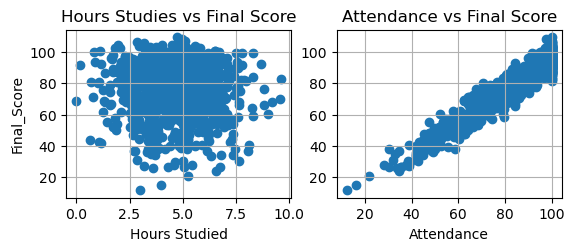

In [3]:
# Visualization using matplotlib

plt.subplot(2,2,1)

plt.scatter(df['Hours_Studied'],df['Final_Score'])
plt.grid(True)
plt.xlabel('Hours Studied')
plt.ylabel('Final_Score')
plt.title('Hours Studies vs Final Score')

plt.subplot(2,2,2)

plt.scatter(df['Attendance'],df['Final_Score'])
plt.grid(True)
plt.xlabel('Attendance')
# plt.ylabel('Final_Score')
plt.title('Attendance vs Final Score')

print('-----------Showing Relationship between Features and Target value----------------')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


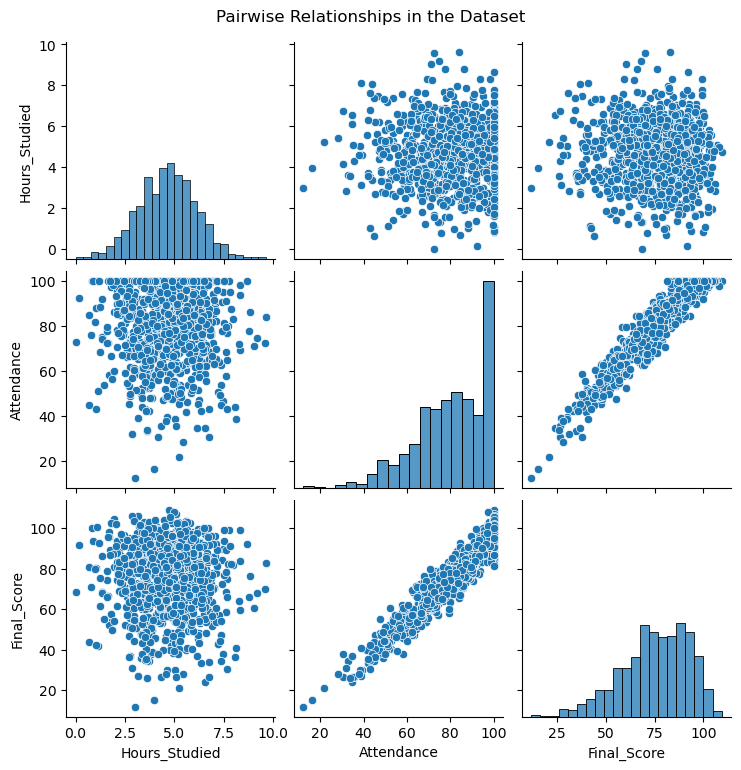

In [4]:
# visualization using seaborn
sns.pairplot(df)
plt.suptitle('Pairwise Relationships in the Dataset', y=1.02)
plt.show()

In [5]:
# Defining features and target

X = df[['Hours_Studied', 'Attendance']]
y = df['Final_Score']

In [6]:
# Splitting data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)

In [7]:
# Training the model

model = LinearRegression()

model.fit(X_train, y_train)

print('-------------Model trained successfully--------------------')

print('Model Coefficients')
print(model.coef_)

print('Model intercept')
print(model.intercept_)

-------------Model trained successfully--------------------
Model Coefficients
[-0.02316065  0.99185252]
Model intercept
-4.293125938306744


In [8]:
# Model accuracy score
y_pred = model.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)

print('Mean Squared Error: ',MSE)
print('Mean Absolute Error: ',MAE)

Mean Squared Error:  24.9581757074612
Mean Absolute Error:  4.015613143029328


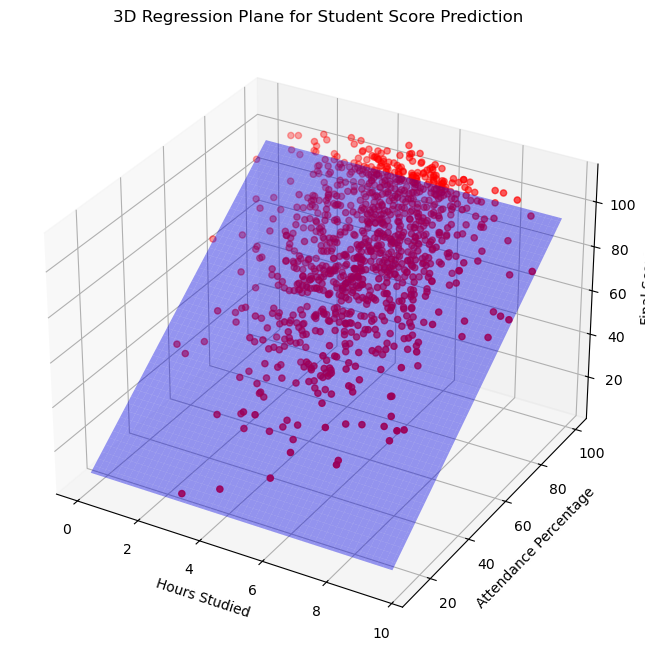

In [9]:
# Visualizing the 3D Regression Plane

# Create a grid of points for the two features to define the plane
# We'll use the min and max values of our features to create the grid
x_surf, y_surf = np.meshgrid(
    np.linspace(df['Hours_Studied'].min(), df['Hours_Studied'].max(), 100),
    np.linspace(df['Attendance'].min(), df['Attendance'].max(), 100)
)

# Predict the Z values (Final_Score) for each point on the grid
# We need to reshape the grid data to feed it into the model
grid_points = pd.DataFrame({'Hours_Studied': x_surf.ravel(), 'Attendance': y_surf.ravel()})
predicted_scores_on_grid = model.predict(grid_points)

# Reshape the predicted scores back into the grid shape for plotting
z_surf = predicted_scores_on_grid.reshape(x_surf.shape)

# Create the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the original data points as a scatter plot
ax.scatter(df['Hours_Studied'], df['Attendance'], df['Final_Score'], color='red', marker='o', label='Actual Data Points')

# Plot the regression plane
# The 'alpha' parameter makes the plane semi-transparent
ax.plot_surface(x_surf, y_surf, z_surf, color='blue', alpha=0.4, label='Regression Plane')

# Set labels for clarity
ax.set_xlabel('Hours Studied')
ax.set_ylabel('Attendance Percentage')
ax.set_zlabel('Final Score')
ax.set_title('3D Regression Plane for Student Score Prediction')

plt.show()

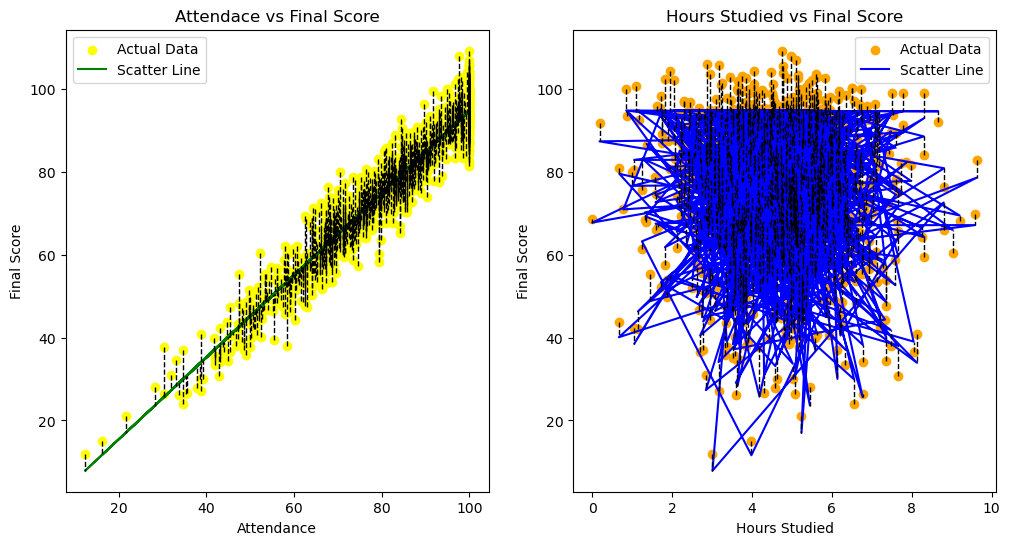

In [31]:
# Plotting regression line for individual features
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.set_title('Attendace vs Final Score')
ax1.set_xlabel('Attendance')
ax1.set_ylabel('Final Score')
y_predicted = model.predict(X)
ax1.scatter(X['Attendance'], y, color='yellow', label='Actual Data')
ax1.plot(X['Attendance'], y_predicted, color='green', label='Scatter Line')
for xi,yi,ypi in zip(X['Attendance'],y,y_predicted):
    ax1.plot([xi,xi],[yi,ypi], color='black', linewidth=1, linestyle='--')
    #print([xi,xi],[yi,ypi])
ax1.legend()

# Plotting Hours Studies vs Final Score

ax2.set_title('Hours Studied vs Final Score')
ax2.set_xlabel('Hours Studied')
ax2.set_ylabel('Final Score')
y_predicted = model.predict(X)
ax2.scatter(X['Hours_Studied'], y, color='orange', label='Actual Data')
ax2.plot(X['Hours_Studied'], y_predicted, color='blue', label='Scatter Line')
for xi,yi,ypi in zip(X['Hours_Studied'],y,y_predicted):
    ax2.plot([xi,xi],[yi,ypi], color='black', linewidth=1, linestyle='--')
    #print([xi,xi],[yi,ypi])
ax2.legend()
plt.show()

In [11]:
# Predicting a new score
study_hours = 4
attendance = 80
final_score = model.predict([[study_hours,attendance]])
print('-------------Prediction for New Student---------------')
print(f'Attendance: {attendance}%')
print(f'Study Hours: {study_hours} hrs\n')
print(f'Predicted Score: {final_score[0]:.2f}%')

-------------Prediction for New Student---------------
Attendance: 80%
Study Hours: 4 hrs

Predicted Score: 74.96%


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
